In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
%matplotlib inline

In [4]:
import psycopg2


postgresDb = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="admin")

In [5]:
class Stockdatadao:
    def __init__(self, db):
        self.db = db

    def select(self, symbol):
        cursor = self.db.cursor()
        sql = """SELECT date_time, open, high, low, close, volume, adj_close
                    FROM stock_data WHERE symbol = %s"""
        val = (symbol,)

        cursor.execute(sql, val)
        result = cursor.fetchall()
        list_stock_data = []

        for item in result:
            list_stock_data.append(
                StockDataViewModel(date_time=item[0], open=item[1], high=item[2], low=item[3],
                                   close=item[4], volume=item[5], adj_close=item[6]))

        cursor.close()
        if result is None:
            return None
        else:
            return list_stock_data


class StockDataViewModel:
    def __init__(self, date_time, open, high, low, close, volume, adj_close):
        self.date_time = date_time
        self.open = open
        self.high = high
        self.low = low
        self.close = close
        self.volume = volume
        self.adj_close = adj_close

    def to_dict(self):
        return {
            'date_time': self.date_time,
            'open': self.open,
            'high': self.high,
            'low': self.low,
            'close': self.close,
            'volume': self.volume,
            'adj_close': self.adj_close
        }

In [15]:
temp_df = pd.read_csv('/mnt/learning/last_project/fetch_data_stock/input/apple.csv')

temp_df['date_time'] = pd.to_datetime(temp_df['date_time'], utc=True, format="ISO8601")
temp_df["date_time"] = temp_df["date_time"].dt.strftime("%Y-%m-%d")
temp_df.index = pd.DatetimeIndex(temp_df["date_time"]) #assign the changed column to the index
temp_df.sort_index(inplace=True)
temp_df = temp_df.loc['1981-05-06':]
##Indexes only in df1: {Timestamp('1982-03-03 00:00:00'), Timestamp('1985-07-09 00:00:00'), Timestamp('1997-05-05 00:00:00'), Timestamp('1982-06-16 00:00:00'), Timestamp('1982-04-05 00:00:00'), Timestamp('1982-06-15 00:00:00')}

temp_df = temp_df.drop(['1982-03-03','1985-07-09','1997-05-05','1982-06-16','1982-04-05','1982-06-15'])

print(len(temp_df))
temp_df.head(3)

10621


,date_time,symbol,high,low,open,close,adj_close,volume,tema_8,tema_2,tema_100
date_time,,,,,,,,,,,
1981-05-06,1981-05-06,AAPL,0.122768,0.122210,0.122768,0.122210,0.094821,18950400,0.123887,0.122307,0.124665
1981-05-07,1981-05-07,AAPL,0.124442,0.123884,0.123884,0.123884,0.096120,9363200,0.123520,0.123690,0.124620
1981-05-08,1981-05-08,AAPL,0.125558,0.125000,0.125000,0.125000,0.096986,7907200,0.123940,0.124981,0.124641


In [16]:
#get the dataset from the csv file into df
df = pd.read_csv('/mnt/learning/last_project/fetch_data_stock/input/clean_apple.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
0,1981-05-06 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,18950400,1.732413,13.797179,34.412223,-100.000000,...,0.096697,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.094897,0.096726,0.096123
1,1981-05-07 00:00:00-04:00,0.096120,0.096553,0.096120,0.096120,9363200,1.755353,41.587538,28.006879,0.000723,...,0.096120,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.095970,0.096691,0.095838
2,1981-05-08 00:00:00-04:00,0.096986,0.097419,0.096986,0.096986,7907200,1.539442,55.827769,22.867958,87.499635,...,0.095976,0.097755,3.707703,0.783887,0.094821,0.097419,0.097203,0.096971,0.096708,0.096163


In [17]:
#rename the column in df
df = df.rename(columns={'Volume': 'volume',
                        'Open': 'open', 'High': 'high',
                        'Low': 'low', 'Close': 'close', 'Date':'date'})
df.tail(2)

,date,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
10624,2023-07-06 00:00:00-04:00,189.839996,192.020004,189.199997,191.809998,45094300,1.407242,60.249293,50.174234,-84.587180,...,191.866669,192.792788,0.965378,0.469404,189.199997,193.880005,190.610001,191.71624,190.783743,192.579596
10625,2023-07-07 00:00:00-04:00,191.410004,192.669998,190.240005,190.679993,46778000,1.344982,41.979730,36.480167,-24.074109,...,191.273331,192.199450,0.968373,0.179664,189.199997,192.979996,191.455002,190.70418,191.312508,191.867859


In [18]:
#Change the type of the date column from object to datetime in df

df['date'] = pd.to_datetime(df['date'], utc=True)
df["date"] = df["date"].dt.strftime("%Y-%m-%d")
df.index = pd.DatetimeIndex(df["date"]) #assign the changed column to the index
df.sort_index(inplace=True)
df = df.loc['1981-05-06':'2023-06-29']
print(len(df))
df.last('3D')

10621


,date,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
date,,,,,,,,,,,,,,,,,,,,,
2023-06-27,2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800,1.568914,73.595133,54.561645,100.000000,...,186.669998,188.948062,2.440739,0.805084,185.009995,188.389999,187.029999,187.899925,186.632078,187.278902
2023-06-28,2023-06-28,187.929993,189.899994,187.600006,189.250000,51216800,1.387183,80.211459,63.784642,100.000000,...,187.526667,190.862702,3.557931,0.758291,185.229996,189.899994,188.750000,189.282870,187.286402,188.519037
2023-06-29,2023-06-29,189.080002,190.070007,188.940002,189.589996,46347300,0.990360,82.130415,70.421457,74.977544,...,188.966665,190.278593,1.388529,0.737563,185.669998,190.070007,189.505005,189.651317,187.927439,189.377760


In [19]:
#drop column date if it exists in df

if 'date' in df.columns:
    df.drop(['date'], axis=1, inplace=True)

#check for null values in df
df.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
NATR_3           0
RSI_3            0
ADX_3            0
CCI_3_0.015      0
ROC_3            0
STOCHk_14_3_3    0
STOCHd_14_3_3    0
WILLR_3          0
OBV              0
MACD_12_26_9     0
BBL_3_2.0        0
BBM_3_2.0        0
BBU_3_2.0        0
BBB_3_2.0        0
BBP_3_2.0        0
min_price_3      0
max_price_3      0
mid_price        0
tema_2           0
tema_100         0
tema_8           0
dtype: int64

In [20]:
# Get the unique indexes from both dataframes
indexes1 = set(temp_df.index)
indexes2 = set(df.index)

# Find the indexes that exist in df1 but not in df2
indexes_only_in_df1 = indexes1 - indexes2

# Find the indexes that exist in df2 but not in df1
indexes_only_in_df2 = indexes2 - indexes1

# Print the unique indexes present in each dataframe
print("Indexes only in df1:", indexes_only_in_df1)
print("Indexes only in df2:", indexes_only_in_df2)

Indexes only in df1: set()
Indexes only in df2: set()


In [21]:
#add adj_close into main df

df["open"] = temp_df["open"]
df["close"] = temp_df["close"]
df["high"] = temp_df["high"]
df["low"] = temp_df["low"]
df['adj_close'] = temp_df['adj_close']
df.head(2)

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close
date,,,,,,,,,,,,,,,,,,,,,
1981-05-06,0.122768,0.122768,0.122210,0.122210,18950400,1.732413,13.797179,34.412223,-100.000000,-3.524019,...,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.094897,0.096726,0.096123,0.094821
1981-05-07,0.123884,0.124442,0.123884,0.123884,9363200,1.755353,41.587538,28.006879,0.000723,-1.769775,...,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.095970,0.096691,0.095838,0.096120


In [22]:
#check for null values in df
df.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
NATR_3           0
RSI_3            0
ADX_3            0
CCI_3_0.015      0
ROC_3            0
STOCHk_14_3_3    0
STOCHd_14_3_3    0
WILLR_3          0
OBV              0
MACD_12_26_9     0
BBL_3_2.0        0
BBM_3_2.0        0
BBU_3_2.0        0
BBB_3_2.0        0
BBP_3_2.0        0
min_price_3      0
max_price_3      0
mid_price        0
tema_2           0
tema_100         0
tema_8           0
adj_close        0
dtype: int64

In [23]:
null_values = df[df['adj_close'].isnull()]

# Print the resulting dataframe containing the null values
print(null_values)

Empty DataFrame
Columns: [open, high, low, close, volume, NATR_3, RSI_3, ADX_3, CCI_3_0.015, ROC_3, STOCHk_14_3_3, STOCHd_14_3_3, WILLR_3, OBV, MACD_12_26_9, BBL_3_2.0, BBM_3_2.0, BBU_3_2.0, BBB_3_2.0, BBP_3_2.0, min_price_3, max_price_3, mid_price, tema_2, tema_100, tema_8, adj_close]
Index: []

[0 rows x 27 columns]


In [24]:
df['volume'] = df['volume'].astype(float)

In [25]:
###get the dataset of apple stock from 2013-01-01 to 2023-06-01 from df
df = df.loc['2013-01-01':'2023-06-28']
df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20',
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-28'],
              dtype='datetime64[ns]', name='date', length=2640, freq=None)

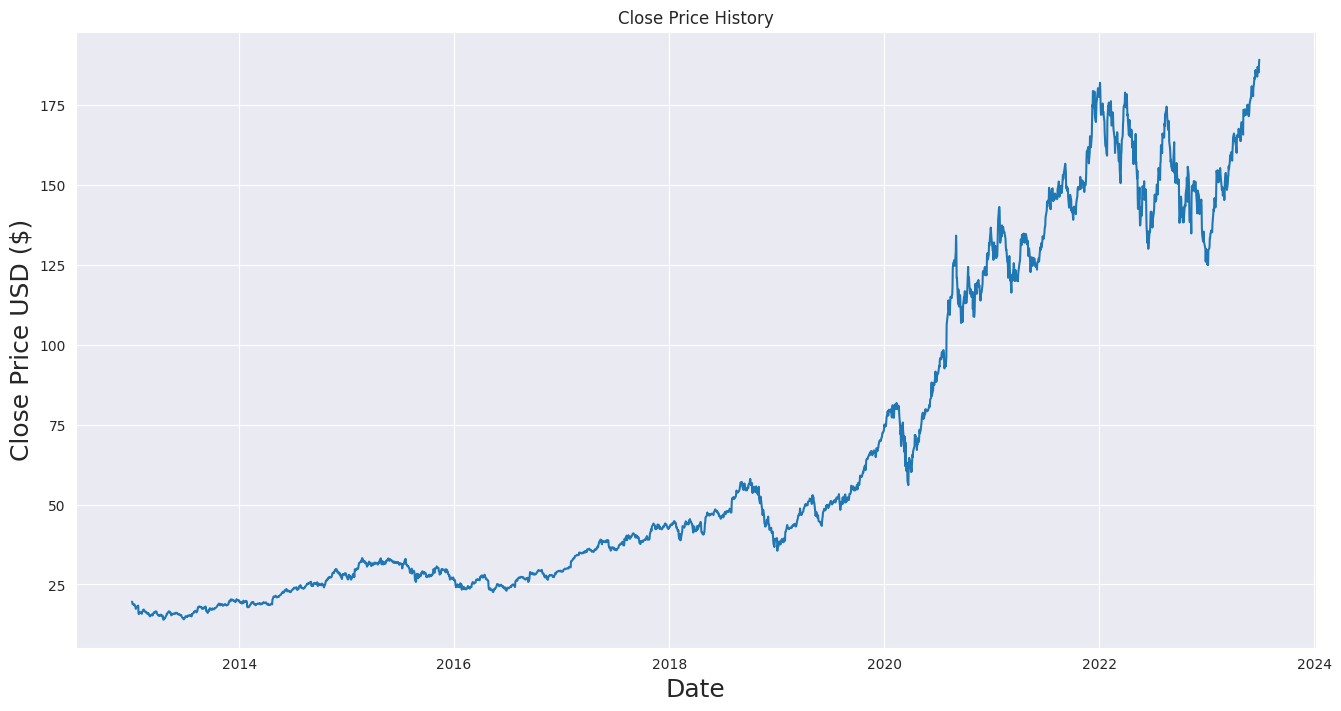

In [26]:
###plot the close price history of AAPL stock from 2013-01-01 to 2023-06-01 from df using matplotlib

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2640 entries, 2013-01-02 to 2023-06-28
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           2640 non-null   float64
 1   high           2640 non-null   float64
 2   low            2640 non-null   float64
 3   close          2640 non-null   float64
 4   volume         2640 non-null   float64
 5   NATR_3         2640 non-null   float64
 6   RSI_3          2640 non-null   float64
 7   ADX_3          2640 non-null   float64
 8   CCI_3_0.015    2640 non-null   float64
 9   ROC_3          2640 non-null   float64
 10  STOCHk_14_3_3  2640 non-null   float64
 11  STOCHd_14_3_3  2640 non-null   float64
 12  WILLR_3        2640 non-null   float64
 13  OBV            2640 non-null   float64
 14  MACD_12_26_9   2640 non-null   float64
 15  BBL_3_2.0      2640 non-null   float64
 16  BBM_3_2.0      2640 non-null   float64
 17  BBU_3_2.0      2640 non-null   flo

In [28]:
#We need to restructure the data set by adding a target column ‘Actual’, which will the stock prices for the next day.

steps=-1
main_dataset = df.copy()
main_dataset['Next date'] = main_dataset['close'].shift(steps)
main_dataset.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close,Next date
date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,48088700.0,1.501054,44.690576,50.819182,5.509362,0.712110,...,1.613475,0.151829,183.669998,188.050003,186.639999,185.347501,186.015535,186.181094,185.270004,188.059998
2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800.0,1.568914,73.595133,54.561645,100.000000,0.566844,...,2.440739,0.805084,185.009995,188.389999,187.029999,187.899925,186.632078,187.278902,188.059998,189.250000
2023-06-28,187.929993,189.899994,187.600006,189.250000,51216800.0,1.387183,80.211459,63.784642,100.000000,1.376691,...,3.557931,0.758291,185.229996,189.899994,188.750000,189.282870,187.286402,188.519037,189.250000,NaN


In [29]:
main_dataset.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
NATR_3           0
RSI_3            0
ADX_3            0
CCI_3_0.015      0
ROC_3            0
STOCHk_14_3_3    0
STOCHd_14_3_3    0
WILLR_3          0
OBV              0
MACD_12_26_9     0
BBL_3_2.0        0
BBM_3_2.0        0
BBU_3_2.0        0
BBB_3_2.0        0
BBP_3_2.0        0
min_price_3      0
max_price_3      0
mid_price        0
tema_2           0
tema_100         0
tema_8           0
adj_close        0
Next date        1
dtype: int64

In [30]:
##dropping columns with null values in dataset_for_prediction

main_dataset.dropna(inplace=True)
main_dataset.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close,Next date
date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,186.830002,188.050003,185.229996,185.270004,48088700.0,1.501054,44.690576,50.819182,5.509362,0.712110,...,1.613475,0.151829,183.669998,188.050003,186.639999,185.347501,186.015535,186.181094,185.270004,188.059998
2023-06-27,185.889999,188.389999,185.669998,188.059998,50730800.0,1.568914,73.595133,54.561645,100.000000,0.566844,...,2.440739,0.805084,185.009995,188.389999,187.029999,187.899925,186.632078,187.278902,188.059998,189.250000


Text(0.5, 1.0, ' Apple Stock Value')

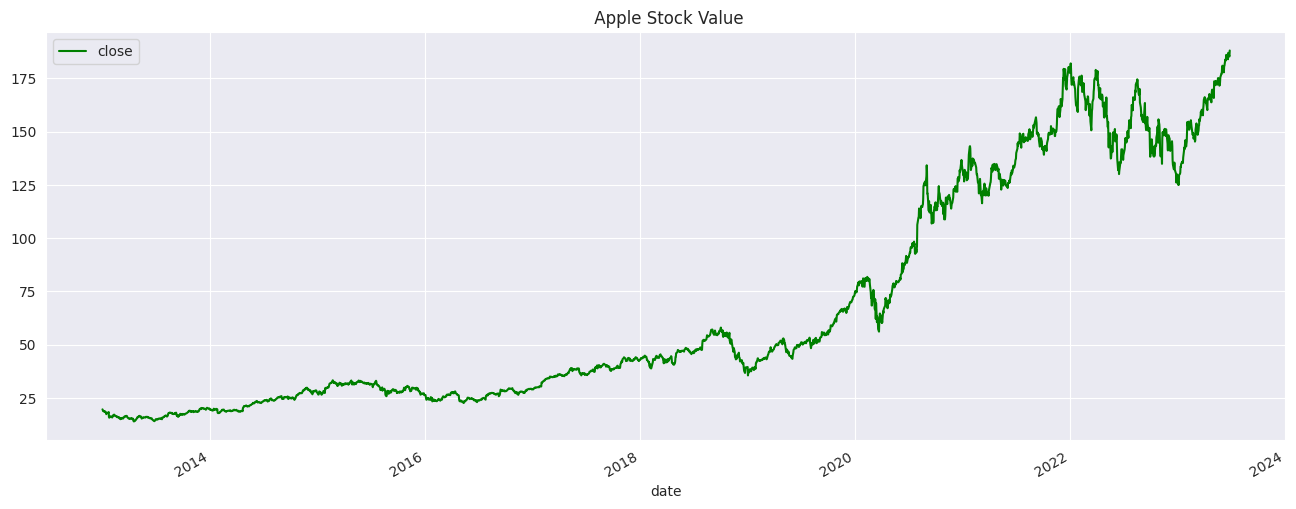

In [31]:
#plot the mean stock prices for the current dataset and lock the trends from df

main_dataset['close'].plot(color='green', figsize=(16, 6))
plt.legend(['close'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple Stock Volume')

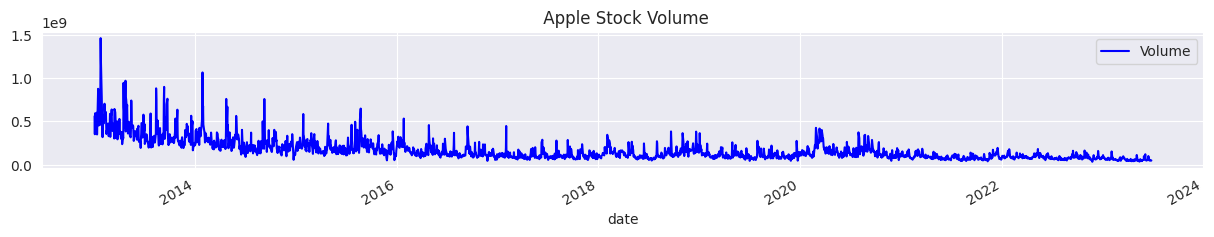

In [32]:
#Plotting volume of Apple stocks sold daily from df

main_dataset['volume'].plot(color='blue', figsize=(15, 2))
plt.legend(['Volume'])
plt.title(" Apple Stock Volume")

In [33]:
test_close = main_dataset[['close']]
test_close.head(4)

,close
date,
2013-01-02,19.608213
2013-01-03,19.360714
2013-01-04,18.821428
2013-01-07,18.710714


In [34]:
test_actual = main_dataset[['close',
                            'Next date']]
test_actual.tail(10)

,close,Next date
date,,
2023-06-13,183.309998,183.949997
2023-06-14,183.949997,186.009995
2023-06-15,186.009995,184.919998
2023-06-16,184.919998,185.009995
2023-06-20,185.009995,183.960007
2023-06-21,183.960007,187.000000
2023-06-22,187.000000,186.679993
2023-06-23,186.679993,185.270004
2023-06-26,185.270004,188.059998


In [35]:
#Normalizing the input and target features
#Since the stock prices and volume are on a different scale, we need to normalize the data. We use StandardScaler to normalize the data. The scaler is fit on the training set and then applied to the test set. This means we need to fit the scaler on the training set and apply the same scaler to the test set.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_input = StandardScaler()

X = main_dataset[['low', 'high', 'open', 'close', 'volume',
                 'NATR_3', 'RSI_3', 'ADX_3', 'CCI_3_0.015',
                 'ROC_3','STOCHk_14_3_3', 'STOCHd_14_3_3',
                 'WILLR_3','OBV', 'MACD_12_26_9', 'BBL_3_2.0',
                 'BBM_3_2.0','BBU_3_2.0', 'BBB_3_2.0',
                 'BBP_3_2.0', 'min_price_3', 'max_price_3',
                 'mid_price', 'tema_2', 'tema_100','tema_8', "adj_close"]]

# X = main_dataset[['low', 'high', 'open', 'close', 'volume', 'tema_2', 'tema_100','tema_8']]
#                                                  # 'NATR_3', 'RSI_3', 'ADX_3', 'CCI_3_0.015',
#                                                  # 'ROC_3','STOCHk_14_3_3', 'STOCHd_14_3_3',
#                                                  # 'WILLR_3','OBV', 'MACD_12_26_9', 'BBL_3_2.0',
#                                                  # 'BBM_3_2.0','BBU_3_2.0', 'BBB_3_2.0',
#                                                  # 'BBP_3_2.0', 'min_price_3', 'max_price_3',
#                                                  # 'mid_price', 'tema_2', 'tema_100','tema_8']]

scaler_input_fit = scaler_input.fit(X)

scaled_data = scaler_input_fit.transform(X)
# scaled_data = scaler.fit_transform(main_dataset[["close", 'Next date']])
scaled_data = pd.DataFrame(scaled_data)

# X = main_dataset[['low', 'high', 'open', 'close', 'volume',
#                                                  'NATR_3', 'RSI_3', 'ADX_3', 'CCI_3_0.015',
#                                                  'ROC_3','STOCHk_14_3_3', 'STOCHd_14_3_3',
#                                                  'WILLR_3','OBV', 'MACD_12_26_9', 'BBL_3_2.0',
#                                                  'BBM_3_2.0','BBU_3_2.0', 'BBB_3_2.0',
#                                                  'BBP_3_2.0', 'min_price_3', 'max_price_3',
#                                                  'mid_price', 'tema_2', 'tema_100','tema_8']]

X = scaled_data
X.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
2636,2.320887,2.285945,2.290632,2.308597,-0.911802,-0.682057,0.575253,-0.220195,0.710693,0.191824,...,2.287782,-0.264566,0.449455,2.331820,2.264864,2.317090,2.324380,2.311178,2.322738,2.322334
2637,2.325183,2.295282,2.315332,2.281422,-0.951961,-0.653459,-0.429567,-0.122452,-0.058602,0.128461,...,2.273045,-0.706558,-1.422978,2.352966,2.274017,2.323871,2.296902,2.320375,2.312562,2.295418
2638,2.333773,2.301761,2.297193,2.335194,-0.930700,-0.593249,0.682663,0.091105,1.112387,0.080155,...,2.294145,-0.429882,1.049049,2.379203,2.280368,2.331321,2.345626,2.332184,2.333516,2.348677


In [36]:
#Scaling the target feature
scaler_output = StandardScaler()

scaler_output_fit = scaler_output.fit(main_dataset[['Next date']])

scaled_target = scaler_output_fit.transform(main_dataset[['Next date']])
scaled_target = pd.DataFrame(scaled_target)

# Y = main_dataset[['Next date']]
Y = scaled_target
Y.tail(3)

,0
2636,2.278144
2637,2.331868
2638,2.354783


In [37]:
#rename X

X.rename(columns={0:'open', 1:'high', 2:'low', 3:'close', 4:'volume', 5:'NATR_3', 6:'RSI_3', 7:'ADX_3', 8:'CCI_3_.015',
                  9:'ROC_3', 10:'STOCHk_14_3_3', 11:'STOCHd_14_3_3', 12:'WILLR_3',13:'OBV', 14:'MACD_12_26_9',
                  15:'BBL_3_2.0', 16:'BBM_3_2.0', 17:'BBU_3_2.0', 18:'BBB_3_2.0', 19:'BBP_3_2.0', 20:'min_price_3',
                  21:'max_price_3', 22:'mid_price', 23:'tema_2', 24:'tema_100',25:'tema_8', 26:'adj_close'}, inplace=True)

# X.rename (columns={0:'low', 1:'high', 2:'open', 3:'close', 4:'volume', 5:'tema_2', 6:'tema_100', 7:'tema_8'}, inplace=True)

X.index=main_dataset.index
X.tail(3)

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close
date,,,,,,,,,,,,,,,,,,,,,
2023-06-23,2.320887,2.285945,2.290632,2.308597,-0.911802,-0.682057,0.575253,-0.220195,0.710693,0.191824,...,2.287782,-0.264566,0.449455,2.331820,2.264864,2.317090,2.324380,2.311178,2.322738,2.322334
2023-06-26,2.325183,2.295282,2.315332,2.281422,-0.951961,-0.653459,-0.429567,-0.122452,-0.058602,0.128461,...,2.273045,-0.706558,-1.422978,2.352966,2.274017,2.323871,2.296902,2.320375,2.312562,2.295418
2023-06-27,2.333773,2.301761,2.297193,2.335194,-0.930700,-0.593249,0.682663,0.091105,1.112387,0.080155,...,2.294145,-0.429882,1.049049,2.379203,2.280368,2.331321,2.345626,2.332184,2.333516,2.348677


In [38]:
#rename Y

Y.rename(columns={0:'Next date'}, inplace=True)
Y.index=main_dataset.index
Y.head(3)

,Next date
date,
2013-01-02,-0.916621
2013-01-03,-0.927005
2013-01-04,-0.929137


In [39]:
#Get the dataset for validation from df

df_for_validation = X.loc['2023-01-01':'2023-06-27']
df_for_validation.tail(3)

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close
date,,,,,,,,,,,,,,,,,,,,,
2023-06-23,2.320887,2.285945,2.290632,2.308597,-0.911802,-0.682057,0.575253,-0.220195,0.710693,0.191824,...,2.287782,-0.264566,0.449455,2.331820,2.264864,2.317090,2.324380,2.311178,2.322738,2.322334
2023-06-26,2.325183,2.295282,2.315332,2.281422,-0.951961,-0.653459,-0.429567,-0.122452,-0.058602,0.128461,...,2.273045,-0.706558,-1.422978,2.352966,2.274017,2.323871,2.296902,2.320375,2.312562,2.295418
2023-06-27,2.333773,2.301761,2.297193,2.335194,-0.930700,-0.593249,0.682663,0.091105,1.112387,0.080155,...,2.294145,-0.429882,1.049049,2.379203,2.280368,2.331321,2.345626,2.332184,2.333516,2.348677


In [40]:
df_for_validation_actual = Y.loc['2023-01-01':'2023-06-27']
df_for_validation_actual.tail(3)

,Next date
date,
2023-06-23,2.278144
2023-06-26,2.331868
2023-06-27,2.354783


In [41]:
#Get the train from X between 2013-01-01 and 2022-12-31

X = X.loc['2013-01-01':'2022-12-31']
X.last('3D')

,open,high,low,close,volume,NATR_3,RSI_3,ADX_3,CCI_3_.015,ROC_3,...,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8,adj_close
date,,,,,,,,,,,,,,,,,,,,,
2022-12-28,1.166256,1.208754,1.212342,1.139863,-0.651408,1.039931,-1.808590,-0.048826,-1.366143,-1.665026,...,1.262499,1.267732,-1.378542,1.214094,1.227674,1.205145,1.159240,1.382697,1.181319,1.157782
2022-12-29,1.202570,1.198273,1.179924,1.208668,-0.729743,1.005395,-0.366050,0.352969,0.133265,-0.675770,...,1.224655,0.616626,0.449459,1.214094,1.208862,1.217621,1.220134,1.369687,1.189732,1.225733
2022-12-30,1.196713,1.188174,1.188028,1.214836,-0.719036,0.366797,-0.257854,0.671281,0.390261,-0.133918,...,1.223029,0.589051,0.647521,1.214094,1.201784,1.209716,1.233380,1.357608,1.201262,1.231823


In [42]:
Y = Y.loc['2013-01-01':'2022-12-31']
Y.last('3D')

,Next date
date,
2022-12-28,1.206350
2022-12-29,1.212512
2022-12-30,1.118927


In [43]:
#Splitting the dataset into training and testing sets

temp_df = main_dataset.loc['2013-01-01':'2022-12-31']

train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)
print(test_size)

504


In [44]:
#Splitting the dataset into training and testing sets using train_size and test_size from df and y respectively
train_X, train_Y = X[:train_size].dropna(), Y[:train_size].dropna()
test_X, test_Y = X[train_size:].dropna(), Y[train_size:].dropna()

In [45]:
test_X.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'tema_100', 'tema_8', 'adj_close'],
      dtype='object')

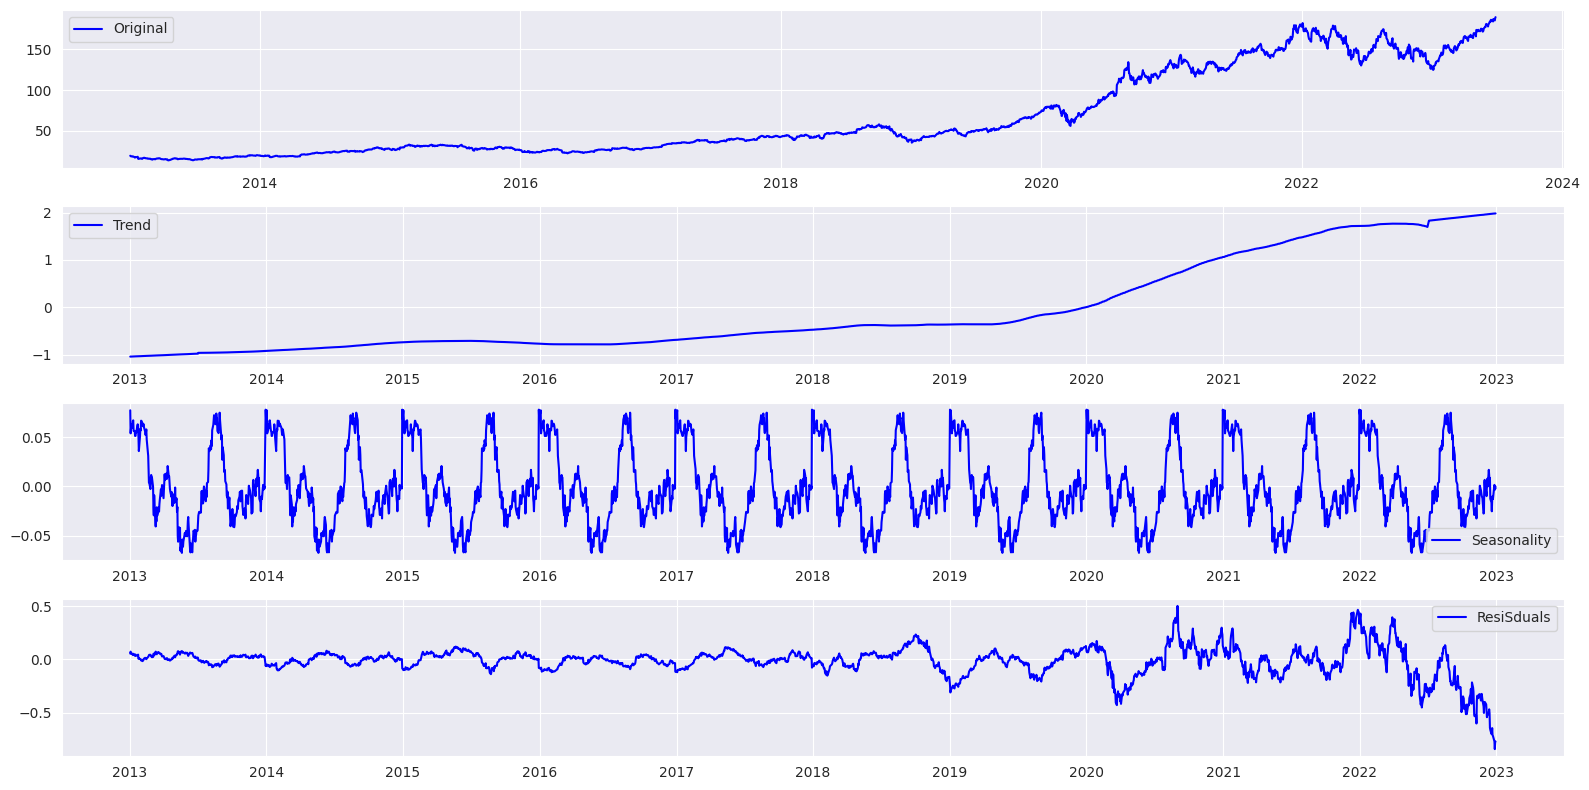

In [46]:
from statsmodels.tsa.stattools import acf
# ###Understanding the Time series data
# Decomposing Time Series into several components-Trend, Seasonality, and Random noise
#
# We know that Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.
#
# We use statsmodel for seasonal decompose as an additive model and the frequency of the time series, which is the periodicity of the data, which is 365 days for yearly data.
#
# Additive model = Trend + Seasonality + Random Noise

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(X['close'], model='add', period=252, extrapolate_trend='freq', two_sided=True, filt=None)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(df['close'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='ResiSduals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [47]:
###Check for Data Stationarity using Augmented Dickey-Fuller(ADF) test.

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def test_adf(series, title=''):
    dfout={}
    dftest = sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)


In [48]:
#Checking for stationary in the data using the ADF test

y_test = Y['Next date'][:train_size].dropna()
test_adf(y_test, 'Next date')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Next date


In [49]:
#Make the data stationary by differencing the data
y_test_diff = y_test.diff().dropna()
test_adf(y_test_diff, 'Stock Price Next Day')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary Stock Price Next Day


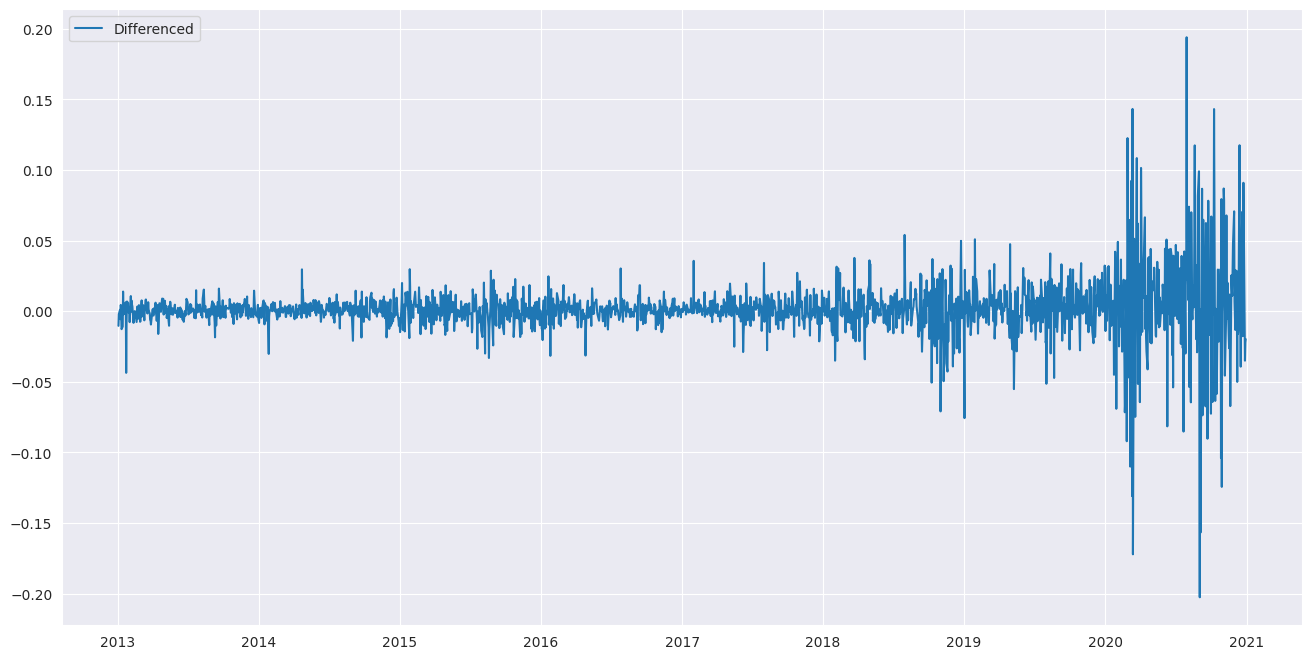

In [50]:
#Plotting the differenced data

plt.figure(figsize=(16, 8))
plt.plot(y_test_diff, label='Differenced')
plt.legend(loc='best')
plt.show()

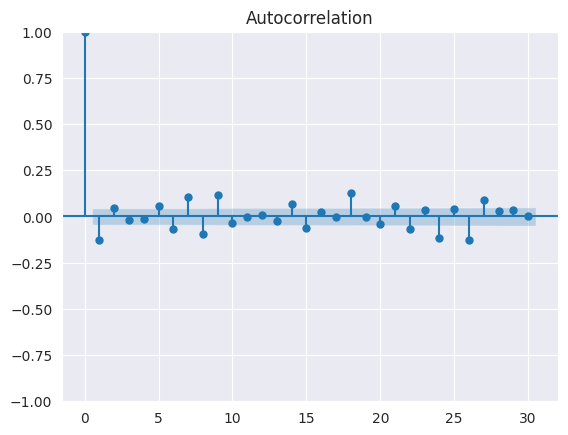

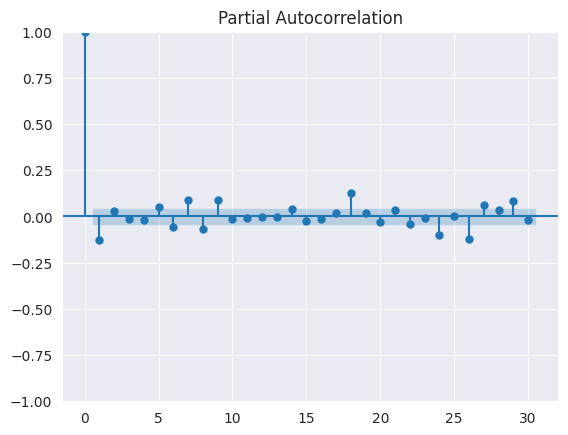

In [51]:
#Plotting the autocorrelation plot for the differenced data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_test_diff, lags=30)
plot_pacf(y_test_diff, lags=30)
plt.show()

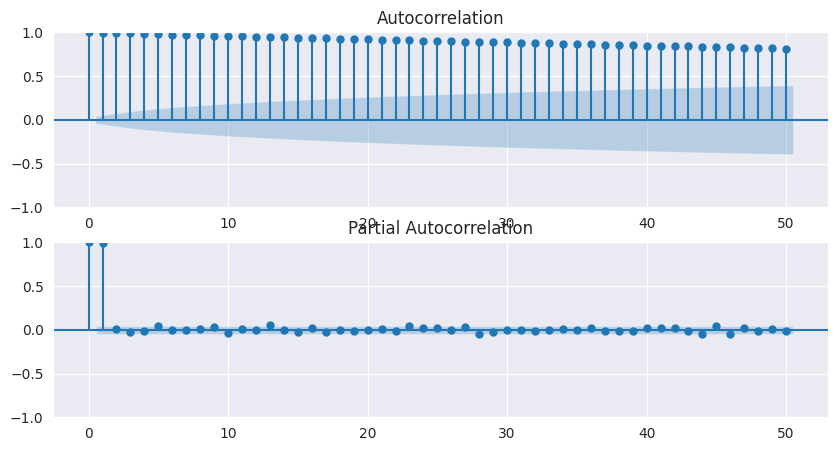

In [52]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [53]:
#Get only tema_2 from train_X, test_X

train_X_with_tema_2 = train_X.drop(['tema_8', 'tema_100'], axis=1)
text_X_with_tema_2 = test_X.drop(['tema_8' , 'tema_100'], axis=1)

train_X_with_tema_2.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'adj_close'],
      dtype='object')

In [54]:
#Get only tema_8 from train_X, test_X

train_X_with_tema_8 = train_X.drop(['tema_2', 'tema_100'], axis=1)
text_X_with_tema_8 = test_X.drop(['tema_2', 'tema_100'], axis=1)

train_X_with_tema_8.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_8', 'adj_close'],
      dtype='object')

In [55]:
#Get only tema_100 from train_X, test_X

train_X_with_tema_100 = train_X.drop(['tema_2', 'tema_8'], axis=1)
text_X_with_tema_100 = test_X.drop(['tema_2', 'tema_8'], axis=1)

train_X_with_tema_100.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_100', 'adj_close'],
      dtype='object')

In [56]:
#Get df without tema from train_X, test_X

train_X_without_tema = train_X.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)
text_X_without_tema = test_X.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)

text_X_without_tema.columns

Index(['open', 'high', 'low', 'close', 'volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'adj_close'],
      dtype='object')

In [114]:
#Get the best parameters of seasonal orders for the SAIRMAX model using the auto_arima function from pmdarima library.

# from pmdarima.arima import auto_arima
#
# stepwise_model = auto_arima(train_Y, exogenous=train_X, start_p=1, start_q=1,
#                             max_p=7, max_q=7, m=12,
#                             start_P=0, seasonal=True,
#                             d=1, max_d=7, D =1, trace=True,
#                             error_action='ignore',
#                             suppress_warnings=True,
#                             stepwise=True)
#
# stepwise_model.summary()

In [59]:
#set the order and seasonal order for all project

# #Average Mean Absolute Percentage Error:  9.007967559508627 (tema_2), 9.494701458098493 (tema_8), 10.553632591175544 (tema_100)
# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 12)

# Average Mean Absolute Percentage Error:  8.929140381017902(tema_2), 9.432941139268372 (tema_8), tema_100
order = (2, 1, 0)
seasonal_order = (2, 1, 0, 12)

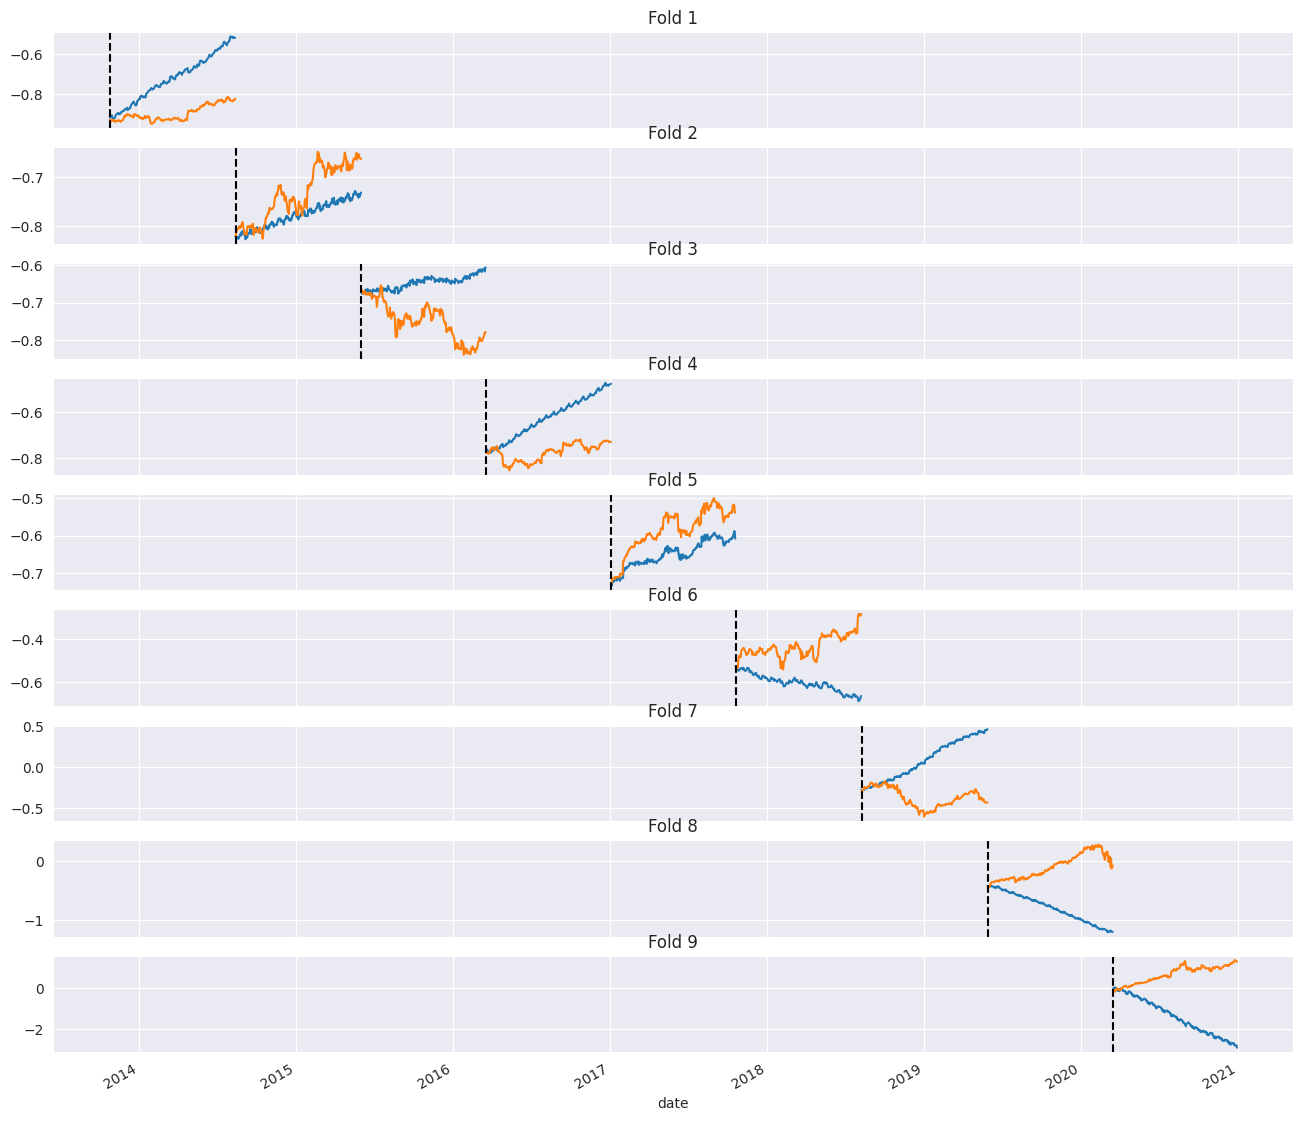

Average Mean Absolute Percentage Error:  24.214853363275882


In [60]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_2
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_2)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=9, test_size=test_size, gap=0)

train_X_with_tema_2 = train_X_with_tema_2.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(9, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_with_tema_2):
    X_train, X_test = train_X_with_tema_2.iloc[train_index], train_X_with_tema_2.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    #turn off the output of the model
    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order)

    model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=False)
    y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)

    y_pred.reset_index(drop=True, inplace=True)
    result = pd.DataFrame(y_pred)
    result.reset_index(drop=True, inplace=True)
    result.index=X_test.index
    result["Next date"] = y_test
    ##plot the predicted and actual values from y_pred and x_test
    result["predicted_mean"].plot(ax=ax[fold], label='Predicted Set', title='Fold {}'.format(fold+1))
    result["Next date"].plot(ax=ax[fold], label='Actual Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape

plt.show()
print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [61]:
#Predicting the values in the validation data using the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_2, order=order, seasonal_order=seasonal_order, enforce_invertibility=False, enforce_stationarity=True)

model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=False)

print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4769.483
Date:                            Sun, 16 Jul 2023   AIC                          -9478.966
Time:                                    15:57:23   BIC                          -9310.923
Sample:                                         0   HQIC                         -9417.266
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
open              0.9948      1.233      0.807      0.420      -1.422       3.412
high              1.0981  

In [62]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_2 = df_for_validation.drop(['tema_8', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_2), exog=df_for_validation_with_tema_2)

In [63]:
#Plotting the forecasted values
forecast_apple_with_tema_2= pd.DataFrame(forecast)
forecast_apple_with_tema_2.reset_index(drop=True, inplace=True)
forecast_apple_with_tema_2.index=df_for_validation_actual.index
forecast_apple_with_tema_2["Actual"] =df_for_validation_actual
forecast_apple_with_tema_2.rename(columns={"predicted_mean": "predicted_close"}, inplace=True)
forecast_apple_with_tema_2.head(10)

,predicted_close,Actual
date,,
2023-01-03,1.215550,1.143767
2023-01-04,1.249275,1.117964
2023-01-05,1.259056,1.206542
2023-01-06,1.260957,1.216748
2023-01-09,1.290708,1.227916
2023-01-10,1.279025,1.281063
2023-01-11,1.277210,1.279523
2023-01-12,1.285539,1.305519
2023-01-13,1.312718,1.328241


<Axes: xlabel='date'>

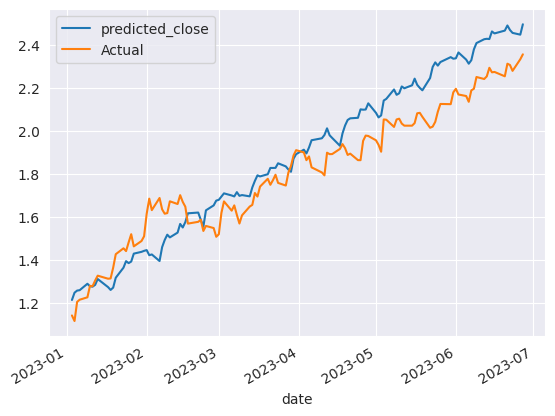

In [64]:
forecast_apple_with_tema_2["predicted_close"].plot(legend=True)
forecast_apple_with_tema_2["Actual"].plot(legend=True)

In [65]:

# #Dự đoán bằng cách lấy giá dự đoán của ngày 2023-01-01 dùng SARIMAX dự đoán cho ngày tiếp theo (2023-01-02) và lặp lại quá trình này 122 lần (tương ứng với 122 ngày trong năm 2023)
# first_day = df_for_validation_with_tema_2.loc["2023-01-03":"2023-01-03"]
# first_day_actual = df_for_validation_actual.loc["2023-01-03":"2023-01-03"]
#
# remaining_days = df_for_validation_with_tema_2.loc["2023-01-04": "2023-12-29"]
#
# forecast = model_fit.forecast(steps=1, exog=first_day)
#
# for index, row in remaining_days.iterrows():
#     # Access the values ofrow["close"] each column in the current row
#     row["close"] = forecast.values[-1]
#     forecast_temp = model_fit.forecast(steps=1, exog=row)
#     forecast = pd.concat([forecast, forecast_temp]) #append the forecasted value to the forecast dataframe
#     forecast = forecast.reset_index(drop=True)

In [66]:
# forecast_apple= pd.DataFrame(forecast)
# forecast_apple.reset_index(drop=True, inplace=True)
# forecast_apple.index=df_for_validation_actual.index
# forecast_apple["Actual"] =df_for_validation_actual
# forecast_apple.rename(columns={0:"predicted_close"}, inplace=True)
# revert_scaler_data_predicted = scaler_output_fit.inverse_transform(forecast_apple[["predicted_close"]])
# revert_scaler_data_actual = scaler_output_fit.inverse_transform(forecast_apple[["Actual"]])
# forecast["predicted_close"] = revert_scaler_data_predicted
# forecast["Actual"] = revert_scaler_data_actual
# forecast_apple.tail(10)

In [67]:
# #Plot the predicted values and the actual values for the validation data
# forecast_apple["predicted_close"].plot(legend=True)
# forecast_apple["Actual"].plot(legend=True)

In [69]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

error=rmse(forecast_apple_with_tema_2["predicted_close"], forecast_apple_with_tema_2["Actual"])
print("The root mean squared error is {}.".format(error))

##calculate the mean absolute percentage error

mape = mean_absolute_percentage_error(forecast_apple_with_tema_2["Actual"],
                                      forecast_apple_with_tema_2["predicted_close"])
print("The mean absolute percentage error is {}.".format(mape))

The root mean squared error is 0.13347238728039934.
The mean absolute percentage error is 0.0625172921710628.


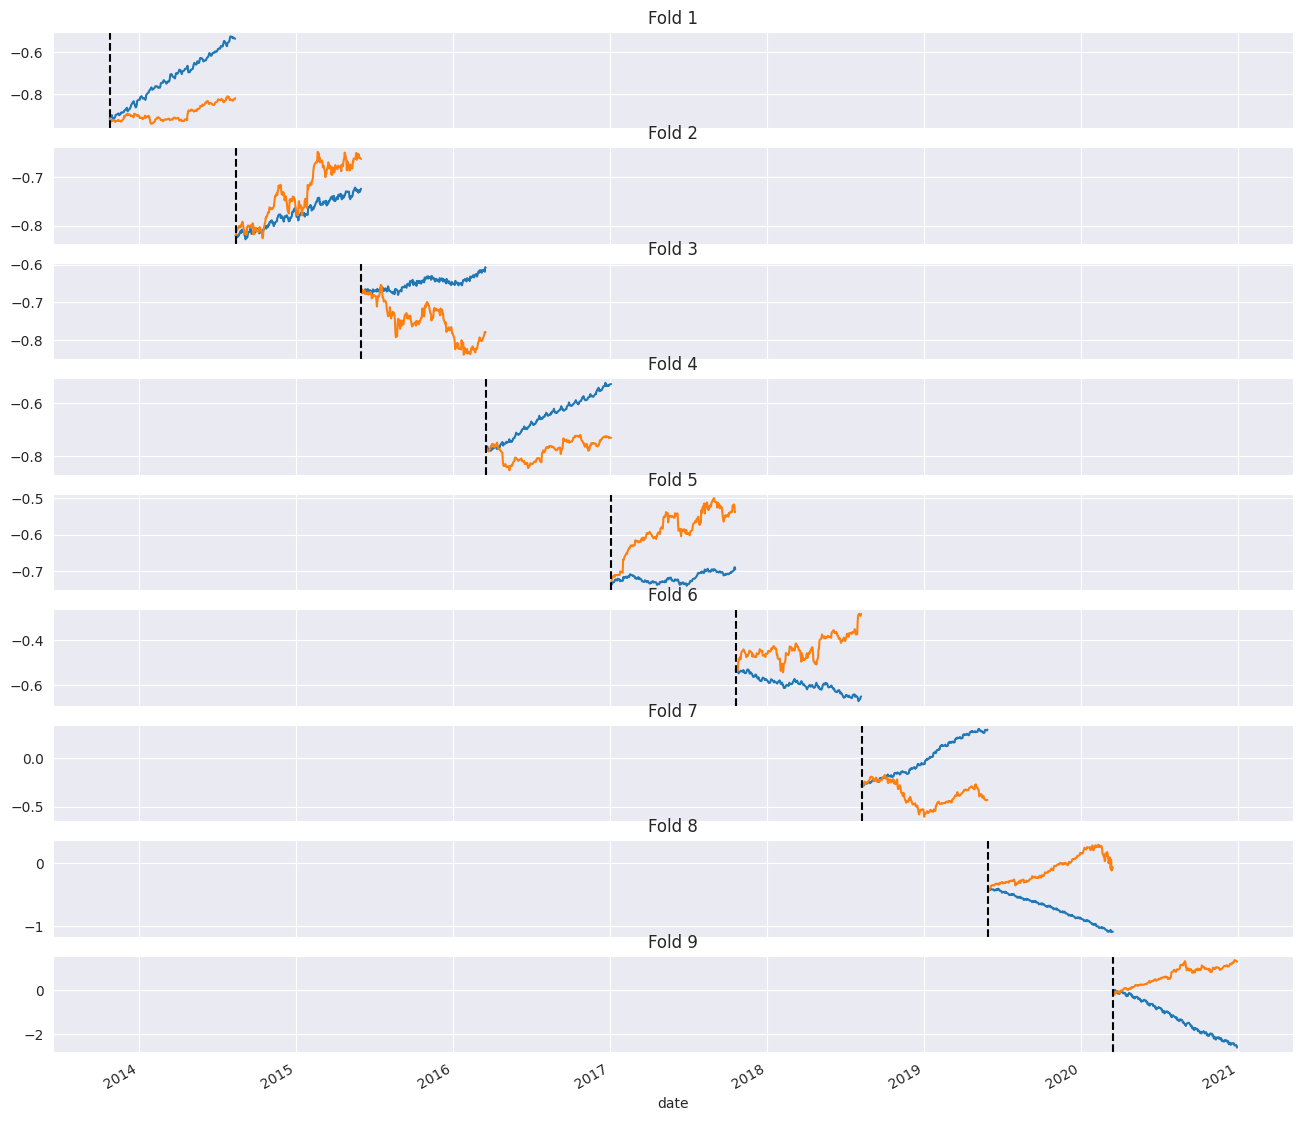

Average Mean Absolute Percentage Error:  21.641132159836566


In [70]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_8

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_8)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=9, test_size=test_size, gap=0)

train_X_with_tema_8 = train_X_with_tema_8.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(9, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0


for train_index, test_index in tscv.split(train_X_with_tema_8):
    X_train, X_test = train_X_with_tema_8.iloc[train_index], train_X_with_tema_8.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    #turn off the output of the model
    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order)

    model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=False)
    y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)

    y_pred.reset_index(drop=True, inplace=True)
    result = pd.DataFrame(y_pred)
    result.reset_index(drop=True, inplace=True)
    result.index=X_test.index
    result["Next date"] = y_test
    ##plot the predicted and actual values from y_pred and x_test
    result["predicted_mean"].plot(ax=ax[fold], label='Predicted Set', title='Fold {}'.format(fold+1))
    result["Next date"].plot(ax=ax[fold], label='Actual Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape

plt.show()
print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [71]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_8, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=True)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4701.806
Date:                            Sun, 16 Jul 2023   AIC                          -9343.613
Time:                                    18:50:57   BIC                          -9175.963
Sample:                                         0   HQIC                         -9282.016
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
open              0.9383      1.161      0.808      0.419      -1.337       3.213
high              1.0015  

In [72]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_8 = df_for_validation.drop(['tema_2', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_8), exog=df_for_validation_with_tema_8)

<Axes: xlabel='date'>

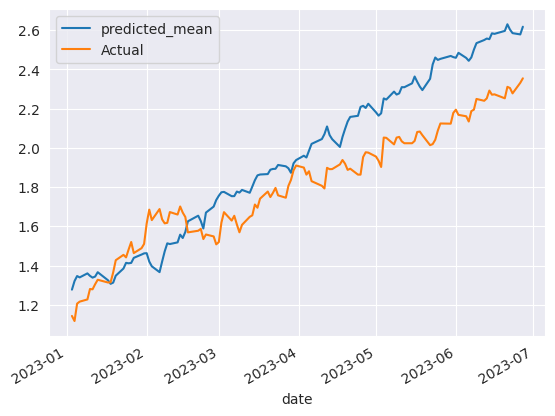

In [73]:
#Plotting the forecasted values

forecast_apple_with_tema_8 = pd.DataFrame(forecast)
forecast_apple_with_tema_8.reset_index(drop=True, inplace=True)
forecast_apple_with_tema_8.index = df_for_validation_actual.index
forecast_apple_with_tema_8["Actual"] = df_for_validation_actual
forecast_apple_with_tema_8.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple_with_tema_8["predicted_mean"].plot(legend=True)
forecast_apple_with_tema_8["Actual"].plot(legend=True)

In [74]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

error=rmse(forecast_apple_with_tema_8["predicted_mean"], forecast_apple_with_tema_8["Actual"])
print("The root mean squared error is {}.".format(error))

##calculate the mean absolute percentage error

mape = mean_absolute_percentage_error(forecast_apple_with_tema_8["Actual"],
                                      forecast_apple_with_tema_8["predicted_mean"])
print("The mean absolute percentage error is {}.".format(mape))

The root mean squared error is 0.21122936190973218.
The mean absolute percentage error is 0.0993237381067531.


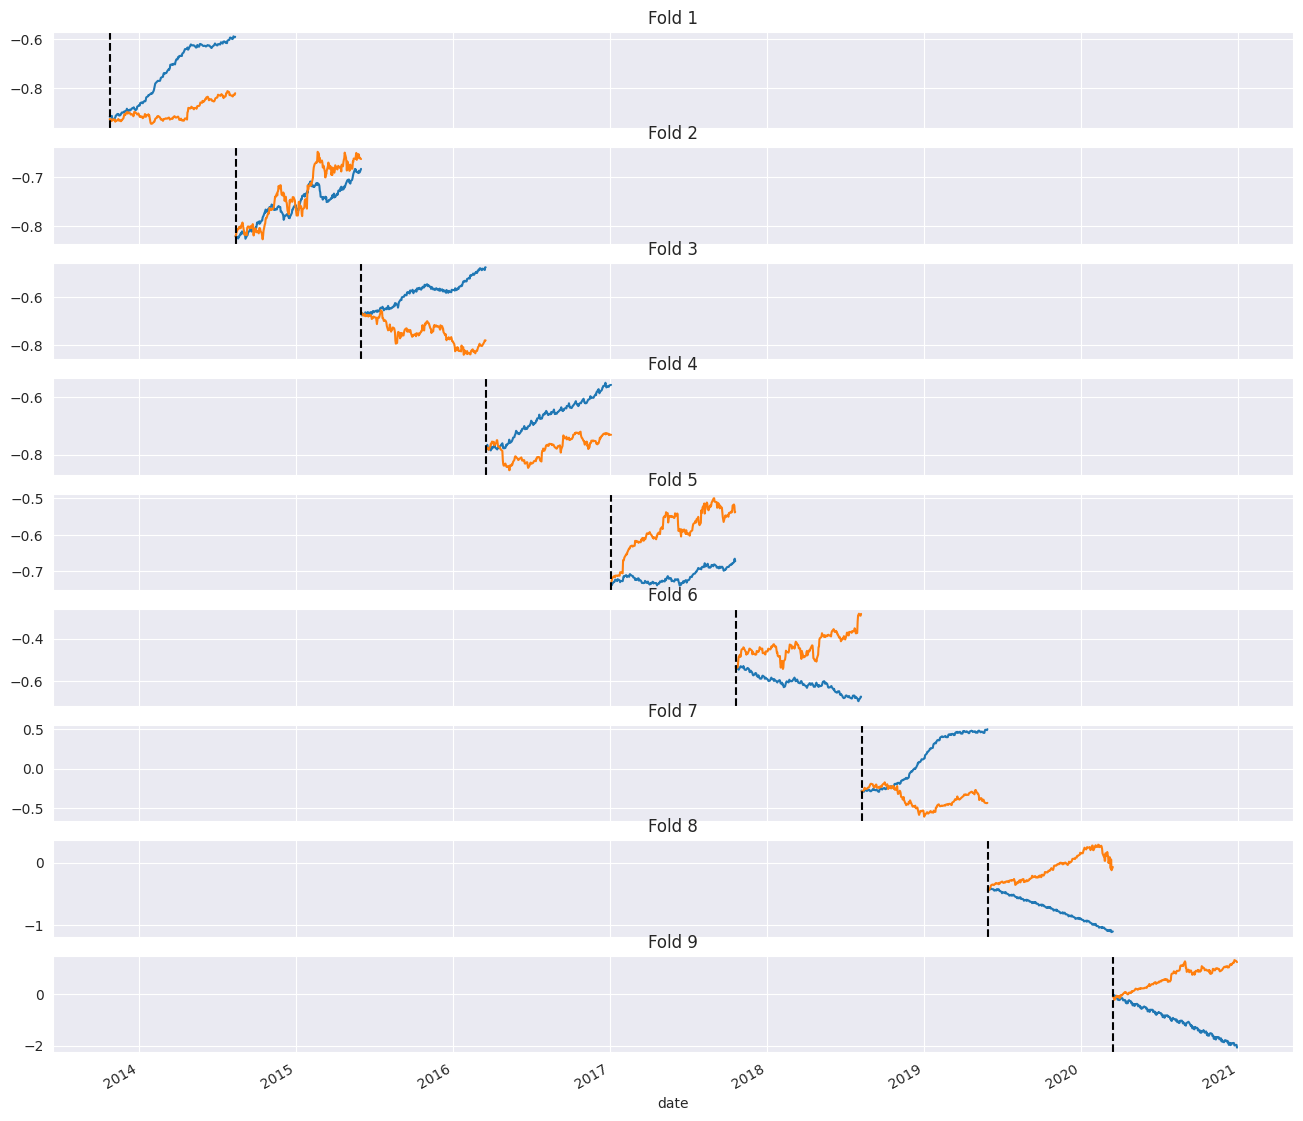

Average Mean Absolute Percentage Error:  22.59734958626897


In [75]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##using tema_100
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_with_tema_100)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=9, test_size=test_size, gap=0)

train_X_with_tema_100 = train_X_with_tema_100.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(9, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0


for train_index, test_index in tscv.split(train_X_with_tema_100):
    X_train, X_test = train_X_with_tema_100.iloc[train_index], train_X_with_tema_100.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    #turn off the output of the model
    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order)

    model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=False)
    y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)

    y_pred.reset_index(drop=True, inplace=True)
    result = pd.DataFrame(y_pred)
    result.reset_index(drop=True, inplace=True)
    result.index=X_test.index
    result["Next date"] = y_test
    ##plot the predicted and actual values from y_pred and x_test
    result["predicted_mean"].plot(ax=ax[fold], label='Predicted Set', title='Fold {}'.format(fold+1))
    result["Next date"].plot(ax=ax[fold], label='Actual Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape

plt.show()
print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [76]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_with_tema_100, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=True)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4702.610
Date:                            Sun, 16 Jul 2023   AIC                          -9345.220
Time:                                    19:07:18   BIC                          -9177.570
Sample:                                         0   HQIC                         -9283.623
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
open              0.9044      1.225      0.739      0.460      -1.496       3.304
high              0.9699  

In [77]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_with_tema_100 = df_for_validation.drop(['tema_2', 'tema_8'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_with_tema_100), exog=df_for_validation_with_tema_100)

<Axes: xlabel='date'>

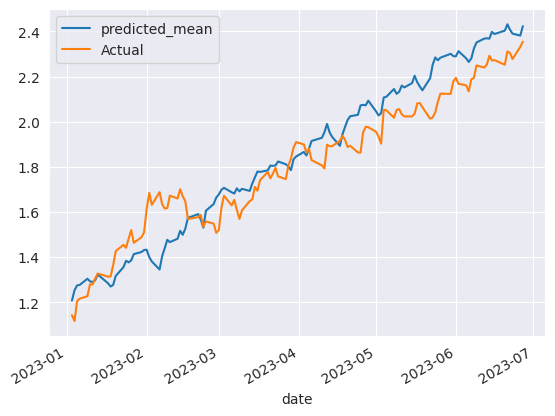

In [78]:
#Plotting the forecasted values

forecast_apple_with_tema_100 = pd.DataFrame(forecast)
forecast_apple_with_tema_100.reset_index(drop=True, inplace=True)
forecast_apple_with_tema_100.index = df_for_validation_actual.index
forecast_apple_with_tema_100["Actual"] = df_for_validation_actual
forecast_apple_with_tema_100.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple_with_tema_100["predicted_mean"].plot(legend=True)
forecast_apple_with_tema_100["Actual"].plot(legend=True)

In [79]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

error=rmse(forecast_apple_with_tema_100["predicted_mean"], forecast_apple_with_tema_100["Actual"])
print("The root mean squared error is {}.".format(error))

##calculate the mean absolute percentage error

mape = mean_absolute_percentage_error(forecast_apple_with_tema_100["Actual"],
                                      forecast_apple_with_tema_100["predicted_mean"])
print("The mean absolute percentage error is {}.".format(mape))

The root mean squared error is 0.11738541171934119.
The mean absolute percentage error is 0.054818879791173655.


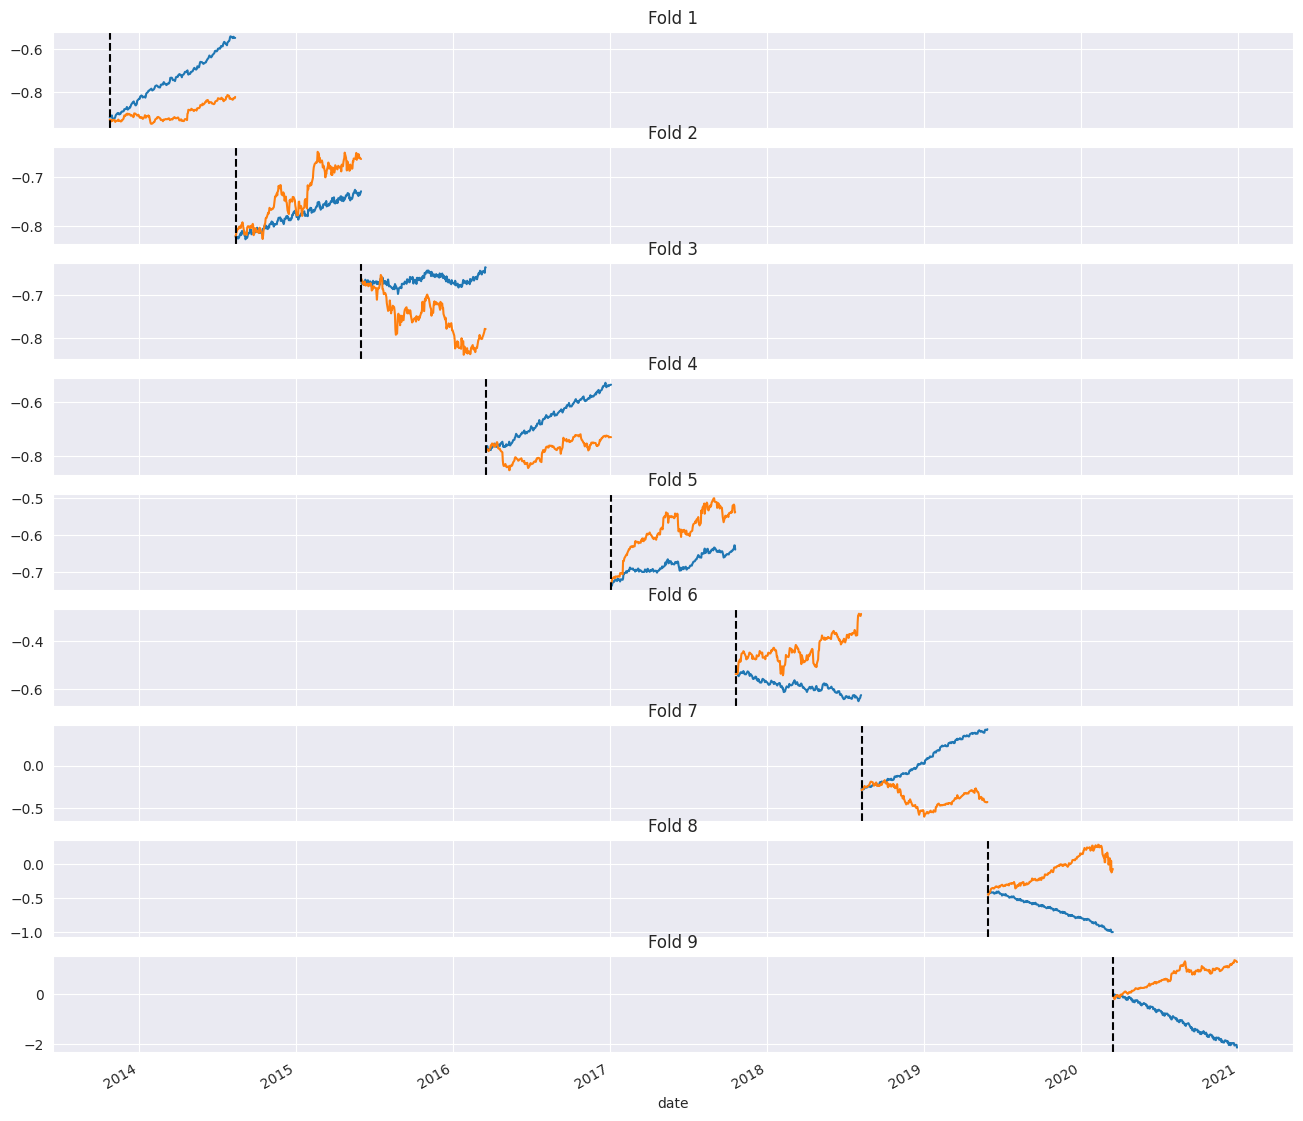

Average Mean Absolute Percentage Error:  19.807199720822585


In [80]:
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

##without tema

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_samples = len(train_X_without_tema)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)
tscv = TimeSeriesSplit(n_splits=9, test_size=test_size, gap=0)

train_X_without_tema = train_X_without_tema.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(9, 1 , figsize=(16, 15), sharex=True)
fold = 0
the_average_mape = 0

for train_index, test_index in tscv.split(train_X_without_tema):
    X_train, X_test = train_X_without_tema.iloc[train_index], train_X_without_tema.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    #turn off the output of the model
    model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order)

    model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=False)
    y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)

    y_pred.reset_index(drop=True, inplace=True)
    result = pd.DataFrame(y_pred)
    result.reset_index(drop=True, inplace=True)
    result.index=X_test.index
    result["Next date"] = y_test
    ##plot the predicted and actual values from y_pred and x_test
    result["predicted_mean"].plot(ax=ax[fold], label='Predicted Set', title='Fold {}'.format(fold+1))
    result["Next date"].plot(ax=ax[fold], label='Actual Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1

    mape = mean_absolute_percentage_error(y_test, y_pred)
    the_average_mape = the_average_mape + mape

plt.show()
print("Average Mean Absolute Percentage Error: ", the_average_mape/5)

In [81]:
#Predicting the values in the validation data using the SARIMAX model
model = SARIMAX(endog=train_Y, exog=train_X_without_tema, order=order, seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
model_fit = model.fit(maxiter=200, method='powell', disp=False, full_output=True)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Next date   No. Observations:                 2014
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4700.447
Date:                            Sun, 16 Jul 2023   AIC                          -9342.894
Time:                                    19:25:07   BIC                          -9180.833
Sample:                                         0   HQIC                         -9283.351
                                           - 2014                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
open              0.8492      1.247      0.681      0.496      -1.595       3.294
high              0.9620  

In [82]:
#Predicting the values in the validation data using the SARIMAX model
df_for_validation_without_tema = df_for_validation.drop(['tema_2', 'tema_8', 'tema_100'], axis=1)
forecast = model_fit.forecast(steps=len(df_for_validation_without_tema), exog=df_for_validation_without_tema)

<Axes: xlabel='date'>

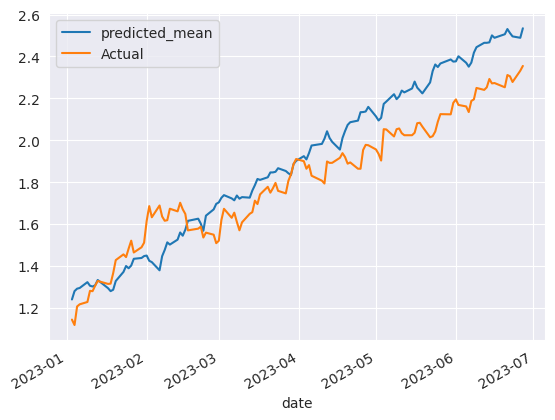

In [83]:
#Plotting the forecasted values

forecast_apple_without_tema = pd.DataFrame(forecast)
forecast_apple_without_tema.reset_index(drop=True, inplace=True)
forecast_apple_without_tema.index = df_for_validation_actual.index
forecast_apple_without_tema["Actual"] = df_for_validation_actual
forecast_apple_without_tema.rename(columns={0: "predicted_close"}, inplace=True)
forecast_apple_without_tema["predicted_mean"].plot(legend=True)
forecast_apple_without_tema["Actual"].plot(legend=True)

In [84]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

error=rmse(forecast_apple_without_tema["predicted_mean"], forecast_apple_without_tema["Actual"])
print("The root mean squared error is {}.".format(error))

##calculate the mean absolute percentage error

mape = mean_absolute_percentage_error(forecast_apple_without_tema["Actual"],
                                      forecast_apple_without_tema["predicted_mean"])
print("The mean absolute percentage error is {}.".format(mape))

The root mean squared error is 0.15729036428481247.
The mean absolute percentage error is 0.07394410644016984.
